# Pymaceuticals Inc.
---

### Analysis

- The more wieght of mouse the higher the volume of tumor
- There are 248 mice after removing the repeater
- The test subjects were more less evenly distrubuted to males and females
- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_results_total = pd.merge(study_results, mouse_metadata, how = 'left')
# Display the data table for preview
data_results_total

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = len(data_results_total.groupby(["Mouse ID"]))
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_results_total.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mice = data_results_total[duplicate_mice]

# Display the duplicate mice data

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_results_total[~data_results_total['Mouse ID'].isin(duplicate_mouse_ids)]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(clean_data.groupby(["Mouse ID"]))
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = data_results_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().values
median=data_results_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().values
variance=data_results_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().values
std_dev=data_results_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().values
std_err=data_results_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().values

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_table = pd.DataFrame ({
    "Mean Tumor Volume":mean ,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev": std_dev,
    "Tumor Volume Std. Err.": std_err
    
},index =data_results_total["Drug Regimen"].unique())
#Name the column for the index as Drug Regimen
sum_table = sum_table.rename_axis("Drug Regimen", axis=0)

sum_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,52.591172,51.776157,39.290177,6.268188,0.469821
Naftisol,52.884795,51.820584,43.128684,6.567243,0.492236
Infubinol,55.235638,53.698743,68.553577,8.279709,0.603860
Stelasyn,54.331565,52.509285,66.173479,8.134708,0.596466
Ramicane,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Zoniferol,40.216745,40.673236,23.486704,4.846308,0.320955
Placebo,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = data_results_total.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std'],
}).reset_index()

# Rename columns for clarity
summary_statistics.columns = ['Drug', 'TumorVolume_Mean', 'TumorVolume_Median','TumerVolume_Variance', 'TumorVolume_Std']

# Display the summary statistics
summary_statistics


,Drug,TumorVolume_Mean,TumorVolume_Median,TumerVolume_Variance,TumorVolume_Std
0,Capomulin,40.675741,41.557809,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003
6,Propriva,52.322552,50.854632,42.351070,6.507770
7,Ramicane,40.216745,40.673236,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589


## Bar and Pie Charts

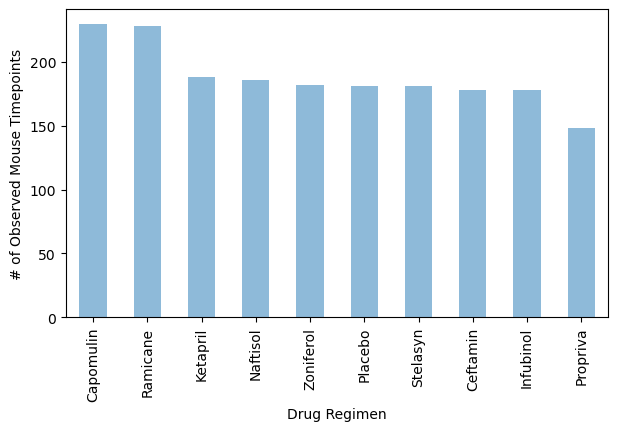

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Group by Drug Regimen and calculate the count of rows for each group
counts_per_regimen = clean_data.groupby("Drug Regimen").size()
counts_per_regimen = counts_per_regimen.sort_values(ascending=False)

# Create a bar plot
counts_per_regimen.plot(kind="bar", figsize=(7, 4),alpha=0.5)

# Labeling and formatting
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='center')

plt.show()





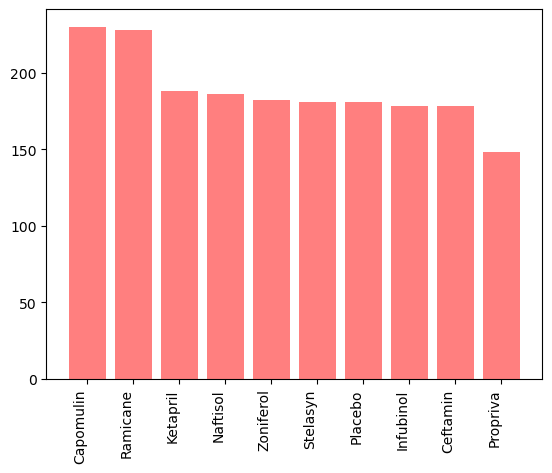

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get unique drug regimens and their respective counts, then create a bar plot
plt.bar(clean_data['Drug Regimen'].value_counts().index, clean_data['Drug Regimen'].value_counts().values, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90, ha='right')
plt.show()

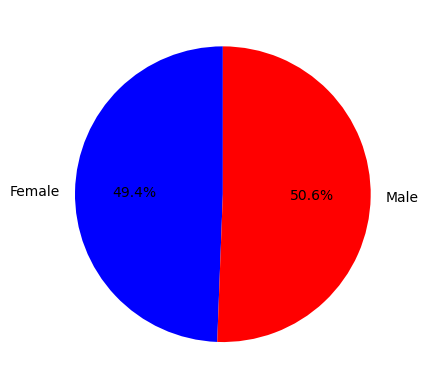

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# divide every mouse into sex
yz = data_results_total.groupby(["Sex"]).size()
yz.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.show()

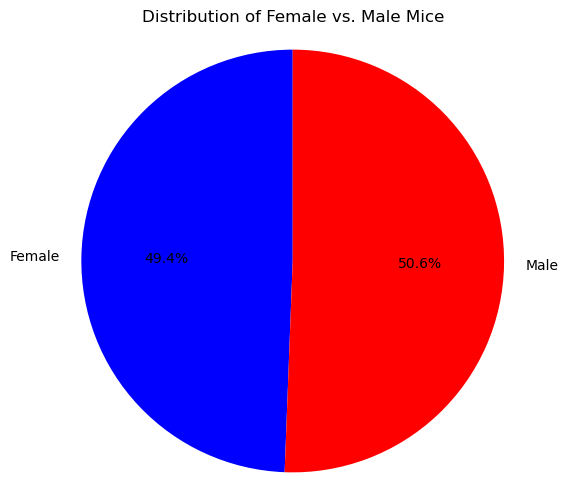

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))
plt.pie(yz, labels=yz.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

# Labeling and formatting
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
desired_drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the DataFrame to include only the desired drug 
filtered_data = clean_data[clean_data["Drug Regimen"].isin(desired_drug_regimens)]

# Calculate the last entry indices for the specified drug 
last_entry_indices = filtered_data.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].idxmax()

# Extract the corresponding rows from the original DataFrame
last_entries = filtered_data.loc[last_entry_indices]

# Print or do further analysis with last_entries
print(last_entries)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
boxy = pd.merge(last_entries, data_results_total, how = 'left')
boxy = boxy[["Mouse ID", "Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
boxy

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1804     a203         45           67.973419                 2    Infubinol   
1786     a251         45           65.525743                 1    Infubinol   
1856     a275         45           62.999356                 3     Ceftamin   
1773     a411         45           38.407618                 1     Ramicane   
1836     a444         45           43.047543                 0     Ramicane   
...       ...        ...                 ...               ...          ...   
1767     y769         45           68.594745                 4     Ceftamin   
1797     y793         45           31.896238                 2    Capomulin   
1766     y865         45           64.729837                 3     Ceftamin   
1799     z578         45           30.638696                 0     Ramicane   
1784     z581         45           62.754451                 3    Infubinol   

         Sex  Age_months  Weight (g)  
1804  Female

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treat =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
# Create empty list to fill with tumor vol data (for plotting)
tumor_data =[] 
for drug in treat:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_entries[last_entries["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_data.append(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]


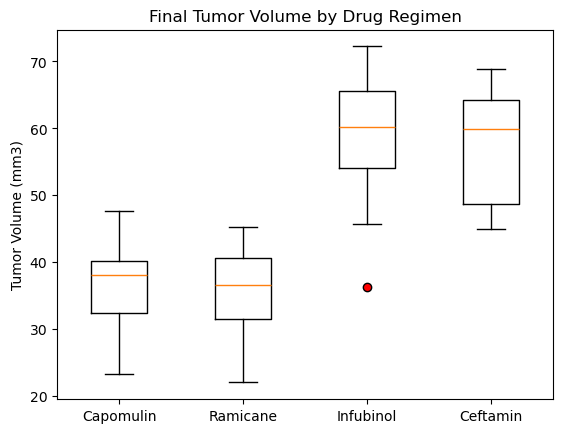

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels=treat, flierprops=dict(markerfacecolor='red'))
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

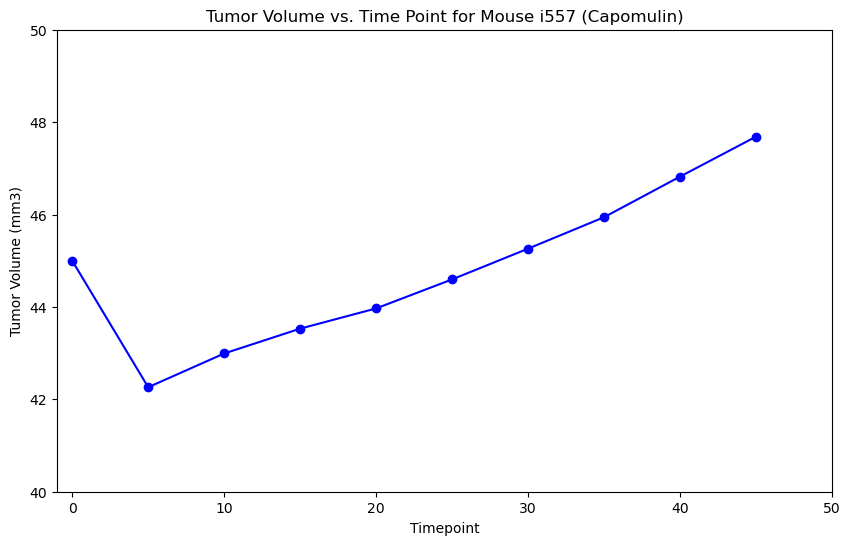

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse = 'i557'

#Filter data for the selected mouse ID and Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]
plt.figure(figsize=(10, 6))
#Create a line plot
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(40,50)
plt.xlim(-1,50)

# Show the plot
plt.show()
selected_mouse_data
capomulin_data

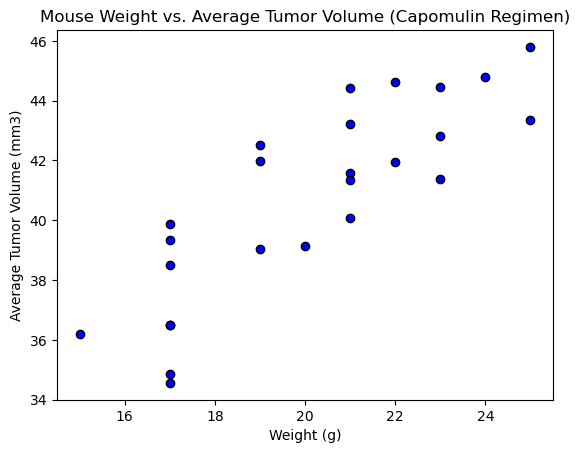

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#Get the weights for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

#Create a scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
